In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\waghh\Desktop\Jupyter notebook\8. Olympics\data\athlete_events.csv")
noc = pd.read_csv(r'C:\Users\waghh\Desktop\Jupyter notebook\8. Olympics\data\noc_regions.csv')

***Lets explore the data***

In [3]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [20]:
data.shape

(271116, 15)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


There are total 271116 athlete participations in Olympics

#### Let's dig in a little

In [6]:
unique_participants = data['ID'].nunique()
unique_participants

135571

Out of the total 271116 participants, 135571 are unique

In [7]:
data['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

Male participation is more than the double of female participation

**Distribution by total athletes in summer and winter**

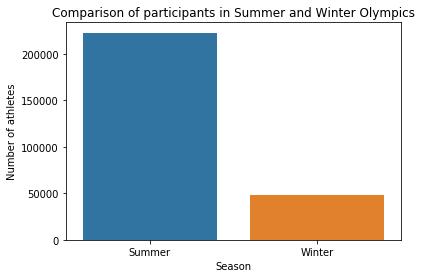

In [5]:
seasonal_participation = data.groupby(['Season'])['ID'].count().reset_index()
sns.barplot(x='Season',y='ID', data=seasonal_participation)
plt.ylabel("Number of athletes")
plt.title("Comparison of participants in Summer and Winter Olympics")
plt.show()

For participations in Summer and winter

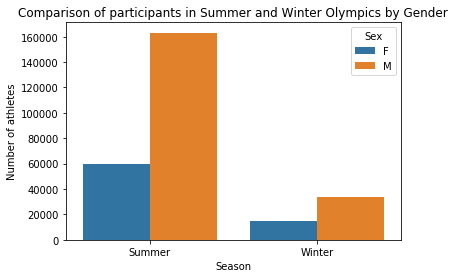

In [10]:
seasonal_participation_by_gender = data.groupby(['Season','Sex'])['ID'].count().reset_index()
sns.barplot(x="Season", y="ID", hue="Sex", data=seasonal_participation_by_gender)
plt.ylabel("Number of athletes")
plt.title("Comparison of participants in Summer and Winter Olympics by Gender")
plt.show()

For Unique participations

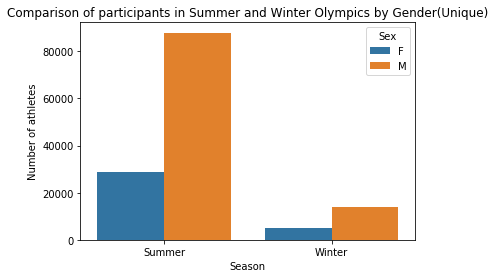

In [13]:
seasonal_participation_by_gender_unique = data.groupby(['Season','Sex'])['ID'].nunique().reset_index()
sns.barplot(x="Season", y="ID", hue="Sex", data=seasonal_participation_by_gender_unique)
plt.ylabel("Number of athletes")
plt.title("Comparison of participants in Summer and Winter Olympics by Gender(Unique)")
plt.show()

**We can see that participation in winter olympics is way less than summer olympics!**

###### Let's move on to talk about Sports

Find the total number of sports in olympics 

In [14]:
data['Sport'].nunique()

66

There are multiple events in a sports let's see how many are there!

In [17]:
data['Event'].nunique()

765

Let's see how many Events are there in each sport!

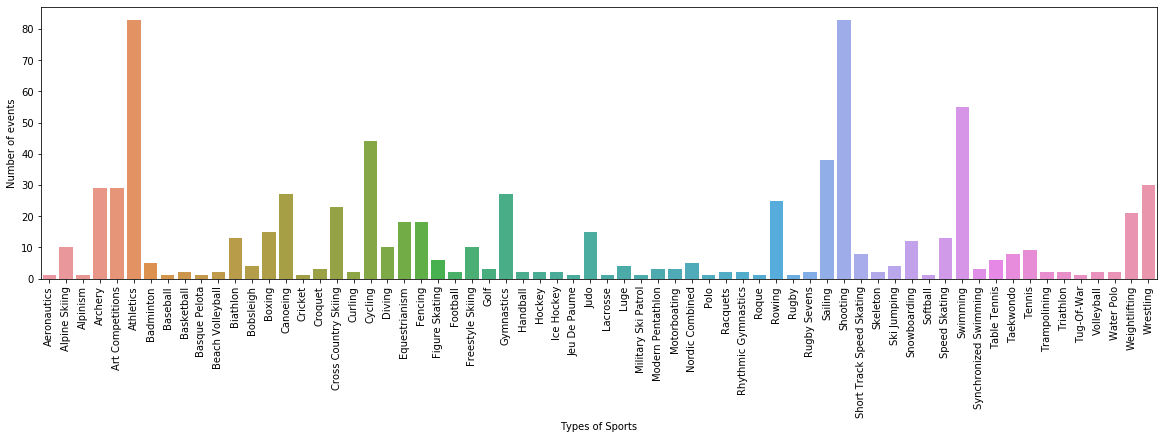

In [18]:
sport_event_ratio = data.groupby('Sport')['Event'].nunique().reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data=sport_event_ratio,x='Sport',y='Event')
plt.xlabel('Types of Sports')
plt.ylabel('Number of events')
plt.xticks(rotation = 90)
plt.savefig('Types of sports and events.png')
plt.show()

***Let's talk about medals***

In [19]:
data_noc=pd.merge(data,noc,how='left',on='NOC')
data_noc.drop_duplicates(inplace=True,keep=False)

In [20]:
data_noc.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [21]:
data_noc.shape

(269119, 17)

In [38]:
medal=data_noc.groupby(['region','Medal'])['Medal'].count()
medal=medal.unstack(level=-1,fill_value=0).reset_index()
medal.head()

Medal,region,Bronze,Gold,Silver
0,Afghanistan,2,0,0
1,Algeria,8,5,4
2,Argentina,91,91,92
3,Armenia,9,2,5
4,Australia,522,368,459


In [39]:
medal['Total']=medal['Bronze']+medal['Gold']+medal['Silver']
total_games=data_noc.groupby('region')['Sport'].nunique().to_frame().reset_index()
total_games.rename({'Sport':'TotalGames'},inplace=True,axis=1)
total_games.head()

,region,TotalGames
0,Afghanistan,7
1,Albania,8
2,Algeria,22
3,American Samoa,9
4,Andorra,12


In [25]:
medal=pd.merge(medal,total_games,how='left',on='region')
medal.sort_values('Total',ascending=False,inplace=True)

In [26]:
medal=medal[['region','TotalGames','Gold','Silver','Bronze','Total']]  ### Reordering the columns
medal.head(10)


,region,TotalGames,Gold,Silver,Bronze,Total
125,USA,58,2638,1641,1358,5637
100,Russia,49,1599,1170,1178,3947
41,Germany,53,1301,1195,1260,3756
124,UK,59,676,739,651,2066
38,France,57,497,594,666,1757
57,Italy,52,575,531,531,1637
112,Sweden,47,479,522,535,1536
18,Canada,53,463,438,451,1352
4,Australia,52,368,459,522,1349
48,Hungary,42,432,332,371,1135


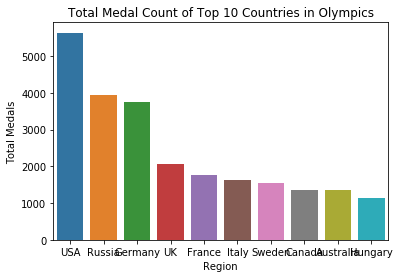

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(medal['region'].head(10),medal['Total'].head(10))
plt.xlabel('Region')
plt.ylabel('Total Medals')
plt.title('Total Medal Count of Top 10 Countries in Olympics')
plt.show()

Let's map the height to weight relationship.

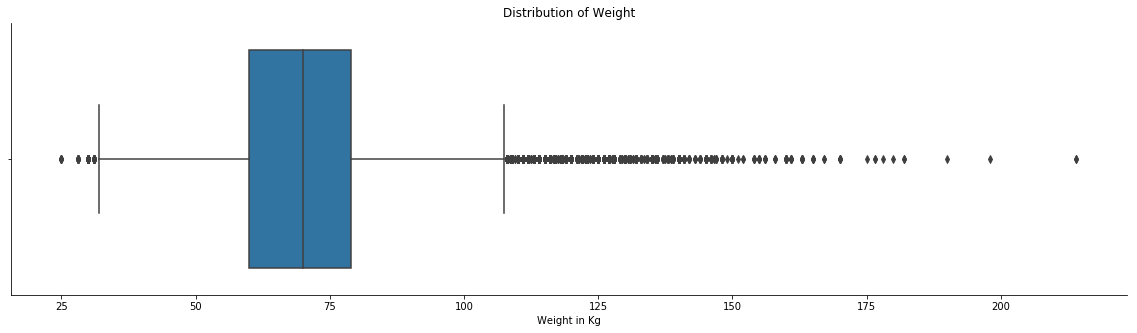

In [187]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='Weight')
plt.title('Distribution of Weight')
plt.xlabel('Weight in Kg')
plt.show()

We found some outlier.

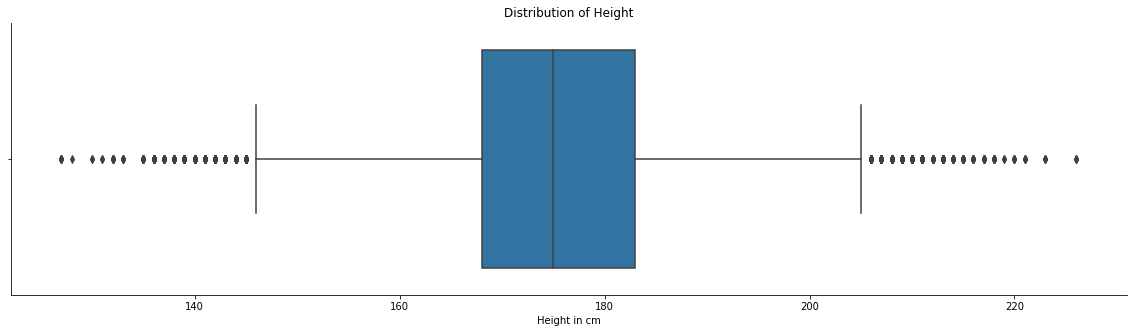

In [182]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='Height')
plt.title('Distribution of Height')
plt.xlabel('Height in cm')
plt.show()

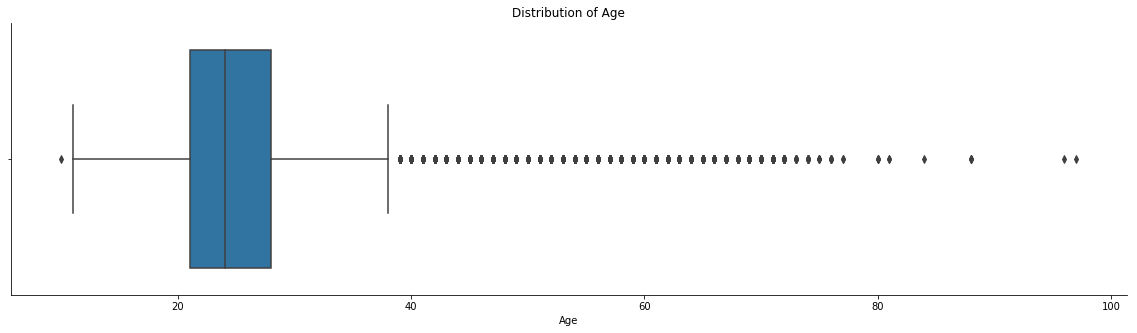

In [178]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,x='Age')
plt.title('Distribution of Age')
plt.show()

Let's look at the distribution of age over years by gender!

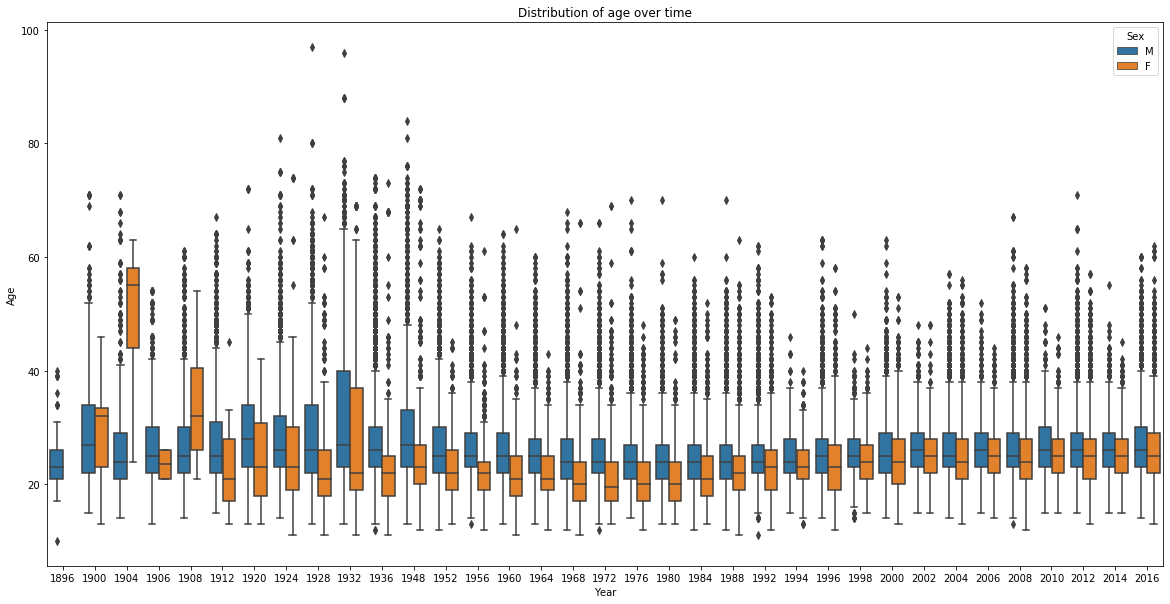

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x='Year',y='Age',hue='Sex')
plt.title('Distribution of age over time')
plt.show()

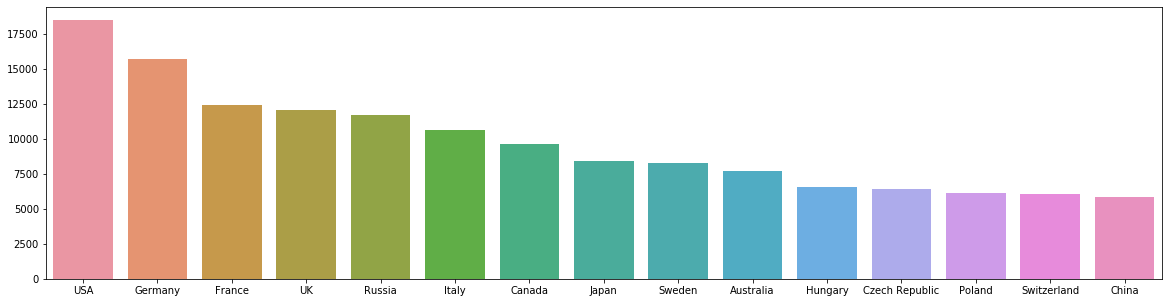

In [38]:
per_country_participation = data_noc['region'].value_counts().nlargest(15)
plt.figure(figsize=(20,5))
sns.barplot(x=per_country_participation.index,y=per_country_participation.values)